<a href="https://colab.research.google.com/github/mos9z/1lab/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/ds_salaries.csv')
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['company_location'] = label_encoder.fit_transform(df['company_location'])

In [5]:

df.info()#пустых данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   int64 
 10  company_size        3755 non-null   object
dtypes: int64(5), object(6)
memory usage: 322.8+ KB


<Axes: >

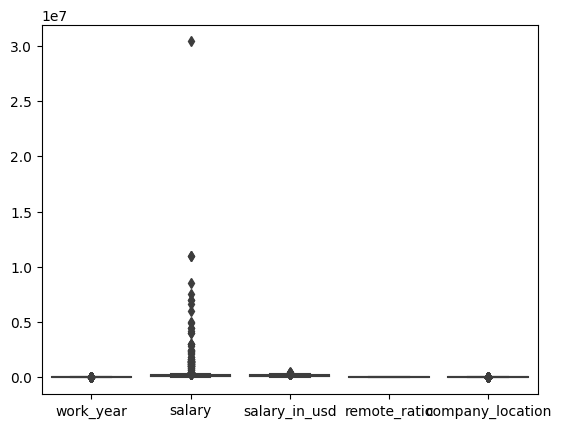

In [6]:
df_clust = df[['salary_in_usd','company_location']].copy()#выбрал эти данные так как хочу разбить продукты на кластеры(по цене, и весу)
sns.boxplot(df)# выбросов нет

In [7]:
df_clust.describe()


,salary_in_usd,company_location
count,3755.000000,3755.000000
mean,137570.389880,62.117177
std,63055.625278,17.495432
min,5132.000000,0.000000
25%,95000.000000,70.000000
50%,135000.000000,70.000000
75%,175000.000000,70.000000
max,450000.000000,71.000000


<ipython-input-8-b213e1a758c9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clust['salary_in_usd'], hist=True, kde=False,


<Axes: xlabel='salary_in_usd'>

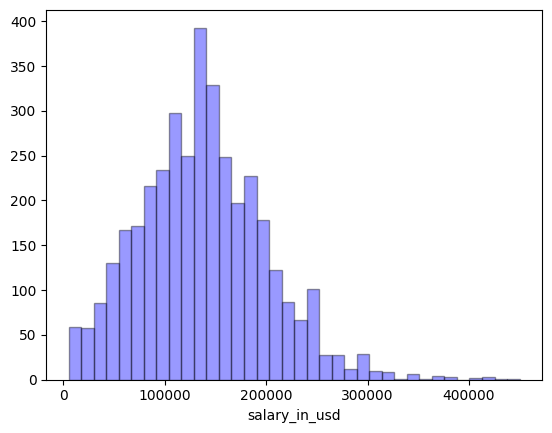

In [8]:
sns.distplot(df_clust['salary_in_usd'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

<ipython-input-9-17ab8d6fd8e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clust['company_location'], hist=True, kde=False,


<Axes: xlabel='company_location'>

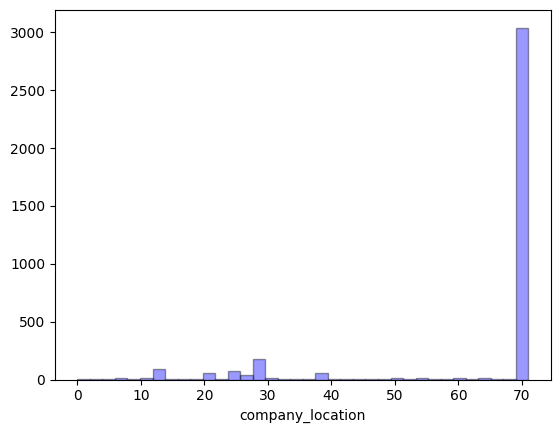

In [9]:
sns.distplot(df_clust['company_location'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})


Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

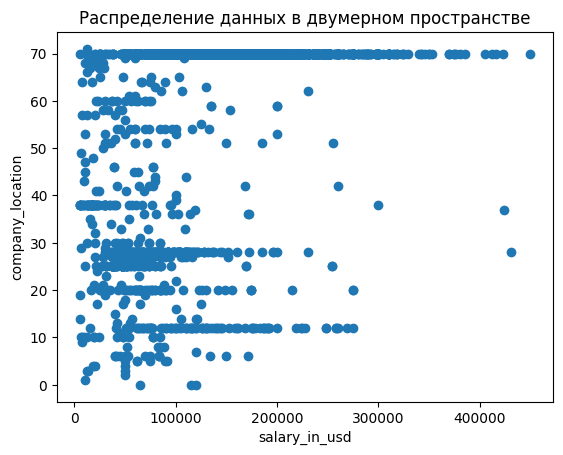

In [10]:
plt.scatter(df["salary_in_usd"], df["company_location"])
plt.xlabel('salary_in_usd')
plt.ylabel('company_location')
plt.title('Распределение данных в двумерном пространстве')
     # your_code here

In [11]:
X = df[["salary_in_usd", "company_location"]]
X


,salary_in_usd,company_location
0,85847,25
1,30000,70
2,25500,70
3,175000,12
4,120000,12
...,...,...
3750,412000,70
3751,151000,70
3752,105000,70
3753,100000,70


In [12]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

'\nЗдесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.\n'

In [13]:
min_max_scaler = MinMaxScaler()
min_max_scal = min_max_scaler.fit_transform(df_clust[['salary_in_usd','company_location']])
df_clust[['salary_in_usd','company_location']] = min_max_scal
df_clust.salary_in_usd.unique()

array([0.18143584, 0.05589973, 0.04578437, ..., 0.05223347, 0.9145814 ,
       0.20125745])

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

Оптимальное число кластеров Calinski Harabasz Score 2, с баллом 11172.839901526224
Оптимальное число кластеров Silhouette Score 2, с баллом 0.7663834857433958
Оптимальное число кластеров Davies Bouldin Score 2, с баллом 0.38312607567716517


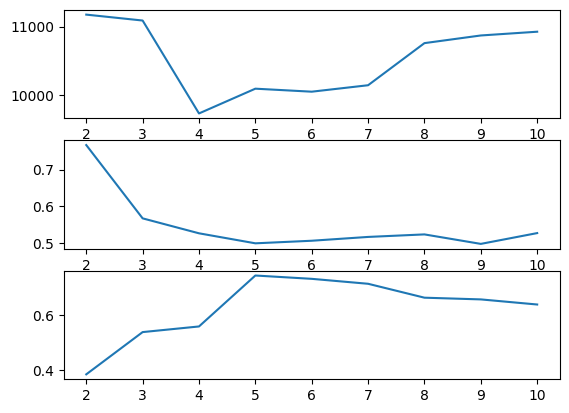

In [15]:
score_1 = []
score_2 = []
score_3 = []
for k in range(2,11):
  kmeans = KMeans(n_clusters= k,n_init = 10,random_state = 42)
  kmeans.fit(min_max_scal)
  score_1.append(calinski_harabasz_score(df_clust,kmeans.labels_))
  score_2.append(silhouette_score(df_clust,kmeans.labels_))
  score_3.append(davies_bouldin_score(df_clust,kmeans.labels_))
print(f"Оптимальное число кластеров Calinski Harabasz Score {score_1.index(max(score_1)) + 2}, с баллом {max(score_1)}")
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")
print(f"Оптимальное число кластеров Davies Bouldin Score {score_3.index(min(score_3)) + 2}, с баллом {min(score_3)}")
fig, axs = plt.subplots(nrows= 3 , ncols= 1 )
axs[0].plot(range(2, 11), score_1)
axs[1].plot(range(2, 11), score_2)
axs[2].plot(range(2, 11), score_3)
# plt.show()

In [16]:
## Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=2)

# Производим кластеризацию данных
kmeans.fit(df_clust)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
print(cluster_centers) # центры кластеров в двумерном пространстве


[[0.32469166 0.98130463]
 [0.16228192 0.34093987]]


In [18]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров k-means\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

In [19]:
print(cluster_labels) #  центры кластеров в двумерном пространстве
# your_code here

[1 0 0 ... 0 0 1]


In [20]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

'\nЗдесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?\n'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


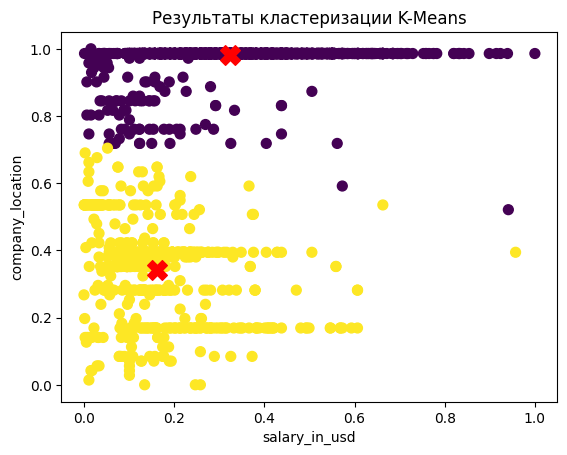

In [21]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=2)

# Производим кластеризацию данных
kmeans.fit(df_clust)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
# Визуализируем результаты кластеризации
plt.scatter(df_clust["salary_in_usd"], df_clust["company_location"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('salary_in_usd')
plt.ylabel('company_location')
plt.title('Результаты кластеризации K-Means')
plt.show()# your_code here

In [22]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров DBSCAN\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

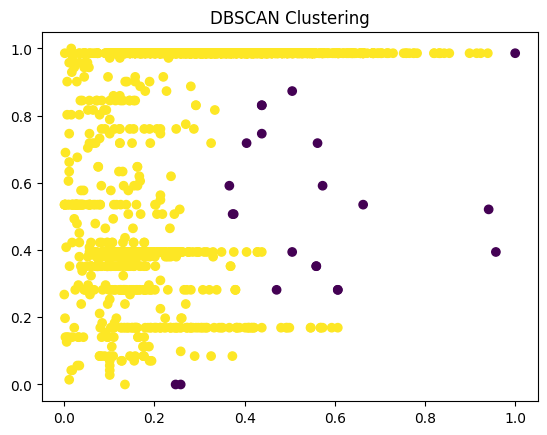

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

df_clust_scaler = StandardScaler().fit_transform(df_clust)

# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan.fit(df_clust_scaler)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(df_clust.to_numpy()[:, 0], df_clust.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()# your_code here

In [24]:
"""
Здесь иерархическая кластеризация и метрики
"""

'\nЗдесь иерархическая кластеризация и метрики\n'

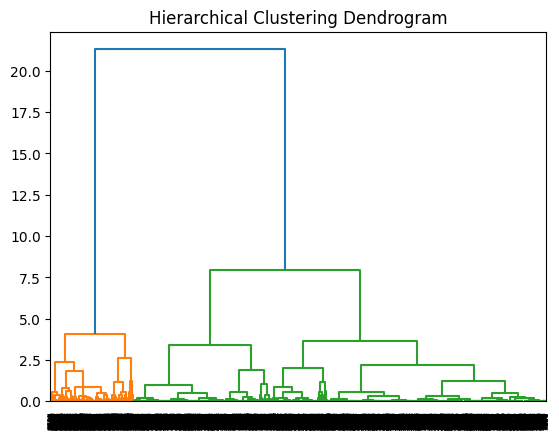

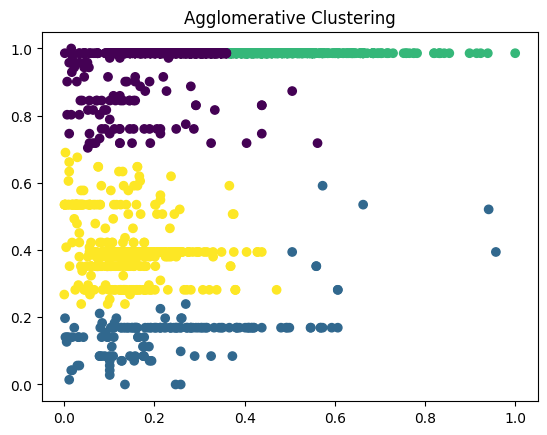

In [25]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Инициализация и обучение модели иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(df_clust)

# Визуализация дендрограммы
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(df_clust, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(df_clust.to_numpy()[:, 0], df_clust.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()# your_code here

In [26]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров иерархической кластеризации\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

Оптимальное число кластеров 2, с баллом 0.6583479516499433


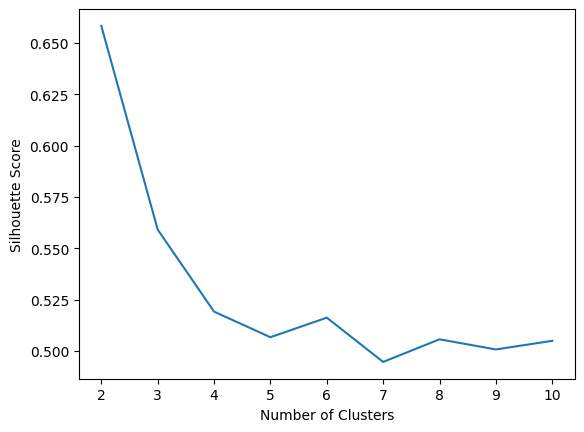

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Нормализация данных
scaler = StandardScaler()
df_clust_scaled = scaler.fit_transform(df_clust)

# Поиск оптимального K
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_clust_scaled)
    score = silhouette_score(df_clust_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()# your_code here

Оптимальное число кластеров 10, с баллом 7616.347474729192


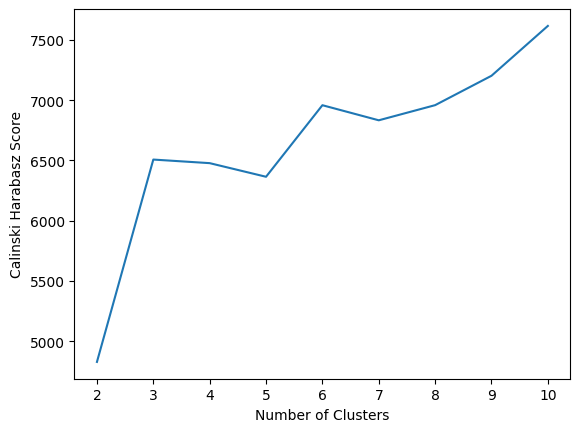

In [28]:
from sklearn.metrics import calinski_harabasz_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_clust_scaled)
    score = calinski_harabasz_score(df_clust_scaled, kmeans.labels_)
    scores.append(score)

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()


Оптимальное число кластеров 2, с баллом 0.5415538335781176


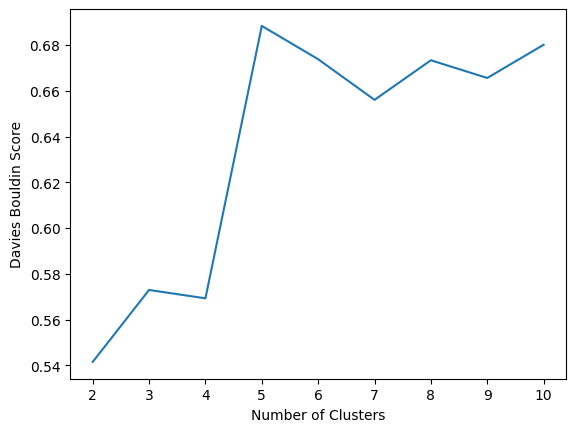

In [29]:
from sklearn.metrics import davies_bouldin_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_clust_scaled)
    score = davies_bouldin_score(df_clust_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(min(scores)) + 2}, с баллом {min(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

In [30]:
df['salary_in_usd'].unique()

array([ 85847,  30000,  25500, ...,  28369, 412000,  94665])

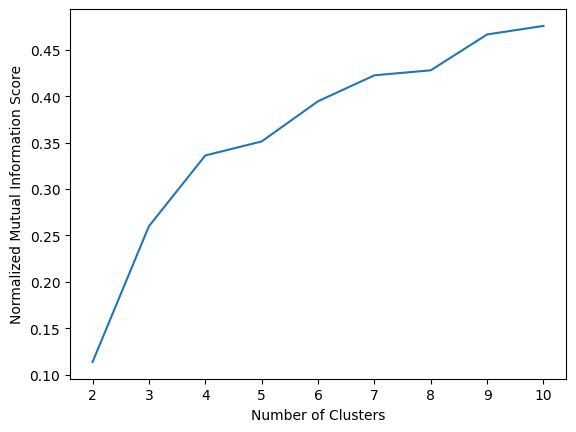

Оптимальное число кластеров 10, с баллом 0.4758139098061295


In [31]:
from sklearn.metrics import normalized_mutual_info_score

# Предположим, что y_true - это истинные метки
y_true = df['salary_in_usd'].to_numpy()
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_clust_scaled)
    score = normalized_mutual_info_score(y_true, kmeans.labels_, average_method='arithmetic')
    scores.append(score)

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Normalized Mutual Information Score')
plt.show()

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")


In [32]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

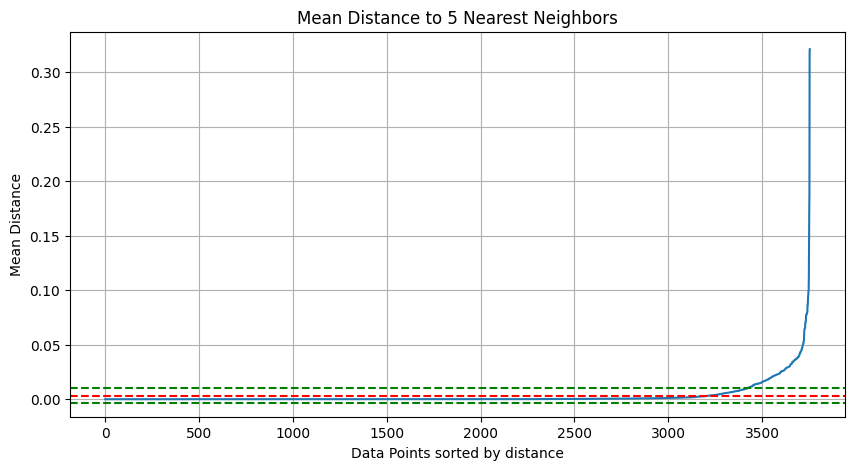

Оптимальный EPS = 0.0033462775866175674


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(min_max_scal):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1 - v2) for j, v2 in enumerate(min_max_scal) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

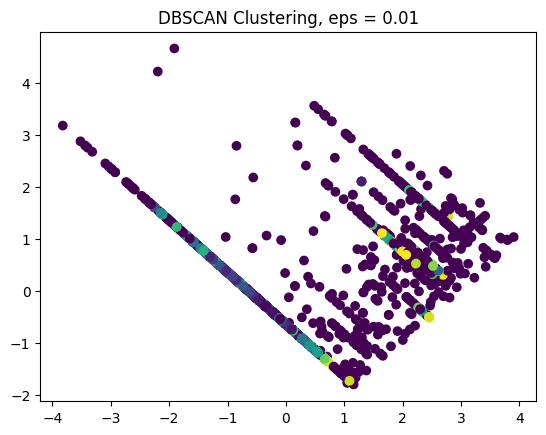

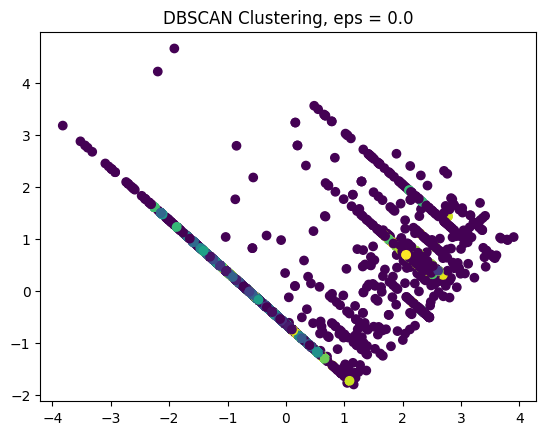

InvalidParameterError: ignored

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Создаем объект PCA и снижаем размерность до 2 компонент, чтобы визуализировать на двумерном графике
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_clust_scaled)

for eps in [np.mean(neighbours) + np.std(neighbours) / 2, np.mean(neighbours), np.mean(neighbours) - np.std(neighbours) / 2]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(df_clust_scaled)
  labels = dbscan.labels_

  # Визуализация результатов, темные точки - выбросы
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()


In [42]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 78.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=e9ceac6a46f4eda950527b2e7ebb8afc70525f0e79de2b440306204c36903419
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

In [43]:
# А теперь выполним профилирование!
# Либа на гитхабе с докой https://github.com/ydataai/ydata-profiling

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

ImportError: ignored

In [44]:
ProfileReport(df[df.dbscan_labels == 0])

NameError: ignored

In [ ]:
df.columns

In [ ]:
x1 = df["salary_in_usd"]
x2 = df["employment_type"]
x3 = df["experience_level"]
x = np.array([[i, j, k] for i, j, k in zip(x1, x2, x3)])
df_clust = StandardScaler().fit_transform(df_clust)
x[:5]


In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clust[:,0], df_clust[:,1], df_clust[:,2])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Создаем объект PCA и снижаем размерность до 2 компонент
pca = PCA(n_components=2)
data_pca = pca.fit_transform(x)

# Восстановим данные обратно в исходное пространство (для демонстрации)
data_restored = pca.inverse_transform(data_pca)
plt.scatter(data_pca[:,0], data_pca[:,1])
plt.xlabel('Компонента 1 (PCA)')
plt.ylabel('Компонента 2 (PCA)')
plt.title('Результат PCA (2 компоненты)')


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Создаем объект t-SNE и снижаем размерность до 2 компонент
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(x)

# Визуализируем данные после применения t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.6)
plt.xlabel('Компонента 1 (t-SNE)')
plt.ylabel('Компонента 2 (t-SNE)')
plt.title('Результат t-SNE (2 компоненты)')
plt.show()

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех